In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
company = pd.read_csv("Company_Data.csv")
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
#Looking into unique value 
company["Sales"].unique()

array([ 9.5 , 11.22, 10.06,  7.4 ,  4.15, 10.81,  6.63, 11.85,  6.54,
        4.69,  9.01, 11.96,  3.98, 10.96, 11.17,  8.71,  7.58, 12.29,
       13.91,  8.73,  6.41, 12.13,  5.08,  5.87, 10.14, 14.9 ,  8.33,
        5.27,  2.99,  7.81, 13.55,  8.25,  6.2 ,  8.77,  2.67, 11.07,
        8.89,  4.95,  6.59,  3.24,  2.07,  7.96, 10.43,  4.12,  4.16,
        4.56, 12.44,  4.38,  3.91, 10.61,  1.42,  4.42,  7.91,  6.92,
        4.9 ,  6.85, 11.91,  0.91,  5.42,  5.21,  8.32,  7.32,  1.82,
        8.47,  7.8 ,  8.85, 13.39,  7.99,  9.46,  6.5 ,  5.52, 12.61,
        8.55, 10.64,  7.7 ,  4.43,  9.14,  8.01,  7.52, 11.62,  2.23,
        8.7 , 11.7 ,  6.56,  7.95,  5.33,  4.81,  4.53,  8.86,  8.39,
        5.58,  9.48,  7.45, 12.49,  4.88,  4.11,  5.3 ,  5.07,  4.62,
        5.55,  0.16,  3.47,  8.98,  9.  ,  6.62,  6.67,  6.01,  9.31,
        8.54,  8.8 ,  7.57,  7.37,  6.87, 11.67,  6.88,  8.19,  8.87,
        9.34, 11.27,  6.52,  4.96,  4.47,  8.41,  9.54,  7.62,  3.67,
        6.44,  5.17,

In [5]:
#Preforming how many times each number is repeated
company["Sales"].value_counts()

7.80    4
6.20    3
6.67    3
8.77    3
6.88    3
       ..
7.50    1
8.89    1
7.58    1
5.64    1
8.14    1
Name: Sales, Length: 336, dtype: int64

In [6]:
#Looking into median to check the median-- middle value, which can help us in Stratified sampling
np.median(company["Sales"])

7.49

In [7]:
company["sales"]="<=7.49"
company.loc[company["Sales"]>=7.49,"sales"]=">=7.49"

In [8]:
company.drop(["Sales"],axis=1,inplace=True)

In [9]:
#Encoding the data as model.fit doesnt convert string data to float
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_names in company.columns:
    if company[column_names].dtype == object:
        company[column_names]= le.fit_transform(company[column_names])
    else:
        pass

In [10]:
company.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,0,42,17,1,1,1
1,111,48,16,260,83,1,65,10,1,1,1
2,113,35,10,269,80,2,59,12,1,1,1
3,117,100,4,466,97,2,55,14,1,1,0
4,141,64,3,340,128,0,38,13,1,0,0


<AxesSubplot:xlabel='Advertising'>

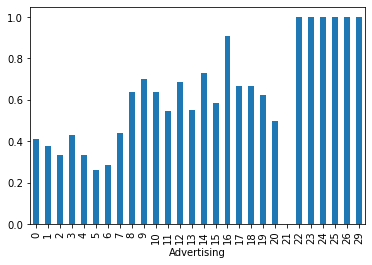

In [12]:
company.groupby('Advertising').sales.mean().plot(kind='bar')

<AxesSubplot:xlabel='ShelveLoc'>

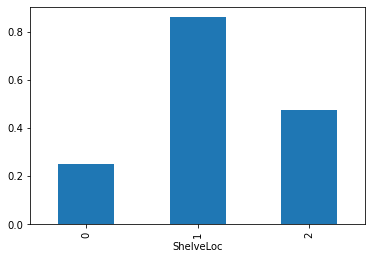

In [15]:
company.groupby('ShelveLoc').sales.mean().plot(kind='bar')

<AxesSubplot:xlabel='Education'>

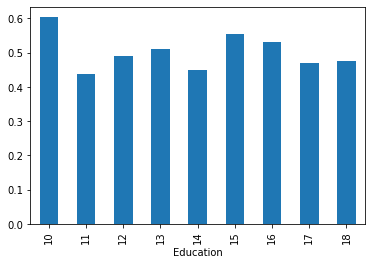

In [16]:
company.groupby('Education').sales.mean().plot(kind='bar')

<AxesSubplot:xlabel='Urban'>

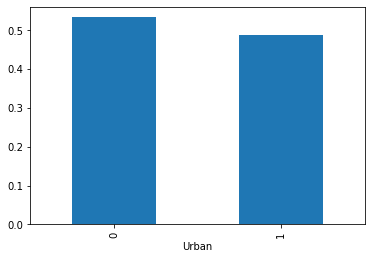

In [17]:
company.groupby('Urban').sales.mean().plot(kind='bar')

<AxesSubplot:xlabel='US'>

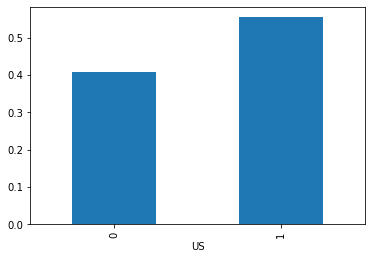

In [18]:
company.groupby('US').sales.mean().plot(kind='bar')

In [9]:
#Splitting the data into input and output
featues = company.iloc[:,0:10]
labels = company.iloc[:,10]

In [10]:
#Splitting the data into train and test by using stratify sampling
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test = train_test_split(featues,labels,test_size = 0.3,stratify = labels) 

In [12]:
#Looking into the class variable split
y_train.value_counts()

1    141
0    139
Name: sales, dtype: int64

In [13]:
y_test.value_counts()

0    60
1    60
Name: sales, dtype: int64

In [14]:
#Building the model
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier as RF

In [15]:
model =RF(n_jobs=4,n_estimators = 150, oob_score =True,criterion ='entropy', max_depth=4) 
model.fit(x_train,y_train)
model.oob_score_

0.7607142857142857

In [16]:
model.estimators_

[DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='auto',
                        random_state=20962668),
 DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='auto',
                        random_state=1786965305),
 DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='auto',
                        random_state=1303417162),
 DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='auto',
                        random_state=1458011224),
 DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='auto',
                        random_state=1745746874),
 DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='auto',
                        random_state=49212664),
 DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='auto',
                        random_state=1169836078),
 DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='auto',
                      

In [17]:
len (model.estimators_)

150

[Text(544.0500000000001, 489.24, 'X[1] <= 101.0\nentropy = 0.997\nsamples = 173\nvalue = [149, 131]'),
 Text(334.8, 380.52000000000004, 'X[5] <= 0.5\nentropy = 0.984\nsamples = 146\nvalue = [138, 102]'),
 Text(167.4, 271.8, 'X[4] <= 103.0\nentropy = 0.75\nsamples = 44\nvalue = [55, 15]'),
 Text(83.7, 163.08000000000004, 'X[1] <= 58.0\nentropy = 0.995\nsamples = 14\nvalue = [13, 11]'),
 Text(41.85, 54.360000000000014, 'entropy = 0.0\nsamples = 5\nvalue = [9, 0]'),
 Text(125.55000000000001, 54.360000000000014, 'entropy = 0.837\nsamples = 9\nvalue = [4, 11]'),
 Text(251.10000000000002, 163.08000000000004, 'X[1] <= 41.5\nentropy = 0.426\nsamples = 30\nvalue = [42, 4]'),
 Text(209.25, 54.360000000000014, 'entropy = 1.0\nsamples = 4\nvalue = [3, 3]'),
 Text(292.95, 54.360000000000014, 'entropy = 0.169\nsamples = 26\nvalue = [39, 1]'),
 Text(502.20000000000005, 271.8, 'X[4] <= 93.5\nentropy = 1.0\nsamples = 102\nvalue = [83, 87]'),
 Text(418.5, 163.08000000000004, 'X[7] <= 15.5\nentropy = 0.2

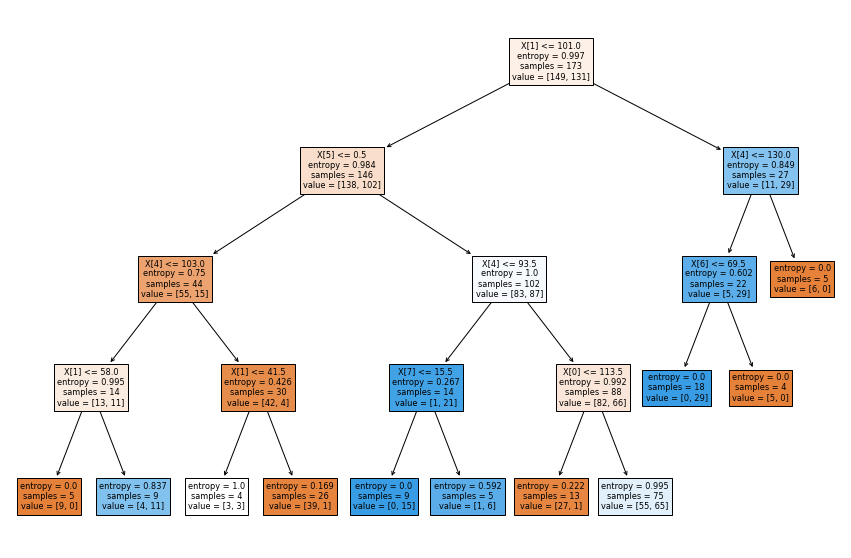

In [18]:
plt.figure (figsize = (15,10))
tree.plot_tree (model.estimators_[1], filled = True)

In [19]:
#Predicting on training data
pred_train = model.predict(x_train)

In [20]:
#Accuracy on training data
from sklearn.metrics import accuracy_score

In [21]:
accuracy_train = accuracy_score(y_train,pred_train)
print(accuracy_score(y_train,pred_train))

0.9321428571428572


In [22]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
con_train = confusion_matrix(y_train,pred_train)

In [23]:
#Prediction on test data
pred_test = model.predict(x_test)

In [24]:
#Accuracy on test data
accuracy_test = accuracy_score(y_test,pred_test)

In [25]:
np.mean(y_test==pred_test)

0.8